In [19]:
from miann.constants import EXPERIMENT_DIR
from miann.data import MPPData
from miann.tl import Experiment
from miann.tl import Cluster
from miann.tl._cluster import add_clustering_to_adata
from miann.pl import annotate_img
import os
import numpy as np
import scanpy as sc
import anndata as ad
from miann.tl import Experiment, FeatureExtractor
import os
from miann.pl import plot_mean_intensity, zscore, get_intensity_change, plot_intensity_change, plot_mean_size, plot_size_change
import anndata as ad
from miann.utils import init_logging
import logging
init_logging(level=logging.WARNING)

In [4]:
from miann.tl import Experiment, FeatureExtractor
import os

exp = Experiment.from_dir('VAE_all/CondVAE_pert-CC')
for data_dir in exp.data_params['data_dirs']:
    # clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR', 'cell_cycle'])

    # annotated clusters
    extr = FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad'))
    extr.extract_intensity_csv(obs=['well_name', 'perturbation_duration', 'TR', 'cell_cycle'])

In [23]:
# load extracted features for clustering_res0.9_sub-0.33_seed1
extrs = [FeatureExtractor.from_adata(os.path.join(exp.full_path, 'aggregated/full_data', data_dir, 'features_annotation.h5ad')) for data_dir in exp.data_params['data_dirs']]

# get combined adata for dotplots
adatas = [extr.get_intensity_adata() for extr in extrs]
adata = ad.concat(adatas, index_unique='-')

In [24]:
np.unique(adata.obs['perturbation_duration'])


array(['AZD4573-120', 'AZD4573-30', 'CX5461-120', 'DMSO-120', 'DMSO-720',
       'Meayamycin-720', 'TSA-30', 'Triptolide-120', 'normal'],
      dtype=object)

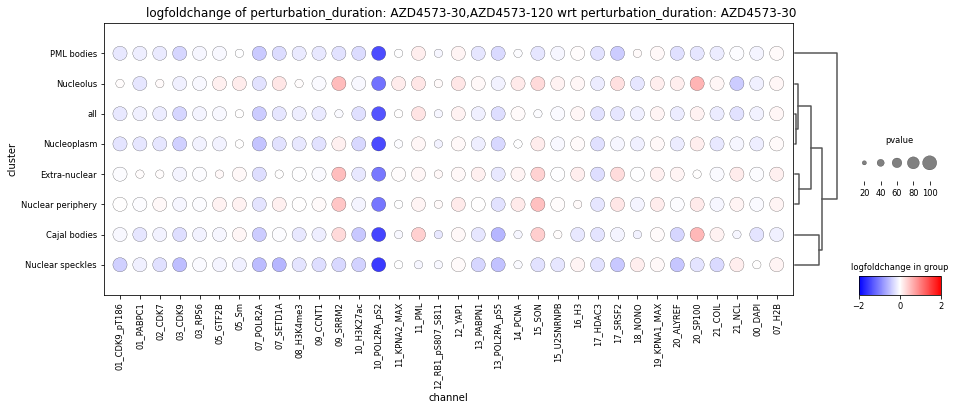

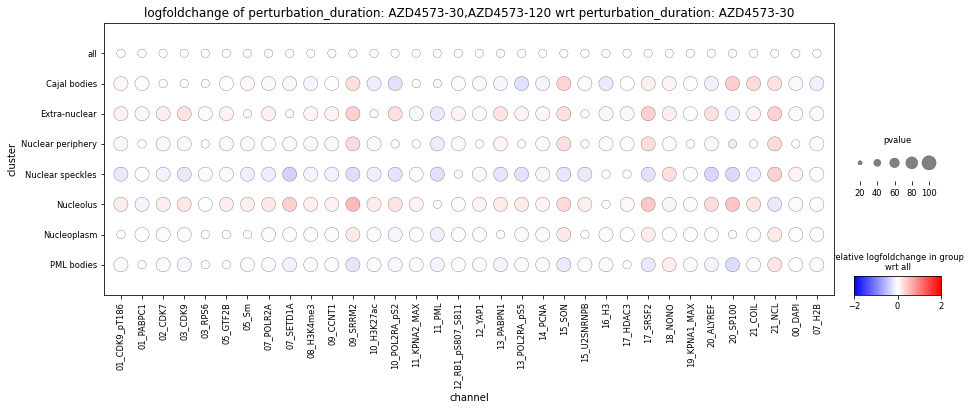

In [27]:
res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['AZD4573-30'], 
    limit_to_groups={'perturbation_duration': ['AZD4573-30', 'AZD4573-120']}, color='logfoldchange', size='pval')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2, dendrogram=True)

res = get_intensity_change(adata, groupby='cluster', reference_group='perturbation_duration', reference=['AZD4573-30'], 
    limit_to_groups={'perturbation_duration': ['AZD4573-30', 'AZD4573-120']}, color='logfoldchange', size='pval', norm_by_group='all')
plot_intensity_change(**res, adjust_height=True, figsize=(15,5), vmin=-2, vmax=2)